# Loan Data from Prosper Exploration
## by Gerard Nonso Obiora


## Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#ue">Univariate Exploration</a></li>
<li><a href="#be">Bivariate Exploration</a></li>   
<li><a href="#me">Multivariate Exploration</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction
Loan Data from Prosper dataset contains 113,937 loans with 81 variables on each loan including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

<a id='wrangling'></a>
## Data Wrangling

### A. Gathering the Data

In [230]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [231]:
# load in the dataset into a pandas dataframe 
prosper_loandata = pd.read_csv('prosperLoanData.csv')

### B. Assessing the Data

In [232]:
# Overview of the dataset
print(prosper_loandata.shape)
print(prosper_loandata.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [233]:
# Carrying out initial checks - 1
prosper_loandata.head(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [234]:
# Carrying out initial checks - 2
prosper_loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [235]:
# Carrying out initial checks - 3
prosper_loandata.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [236]:
# Carrying out initial checks - 4
columns_list = list(prosper_loandata)
print (columns_list)

['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'Deb

### C. Cleaning the Data

In [237]:
# creates a copy of the dataset and would be used where cleaning needs are required accordingly
prosper_loandata_clean = prosper_loandata.copy()

In [238]:
# Shows the first ten rows of the copied dataset
prosper_loandata_clean.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### What is the structure of your dataset?

> There are just 10 rows in the dataset with 81 features (columns). Sixty-one (61) features are numeric in nature while 10 are non-numeric. Also, some of the features have null values.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in ascertaining the feature(s) that can affect BorrowerAPR (Annual Percentage Rate) for a loan.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that borrower's occupation, EmploymentStatus, EmploymentStatusDuration, term, loan original amount amongst other features will support my investigation into the main feature (BorrowerAPR) of interest.

<a id='ue'></a>
## Univariate Exploration

> Here, single variable exploration of the dataset features will be investigated.

### Research Question 1: Which Borrower's Annual Percentage Rate was highest by count?

In [239]:
# Summing the number of each BorrowerAPR
prosper_loandata_clean['BorrowerAPR'].value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.37266       1
0.27518       1
0.18477       1
0.29961       1
0.19543       1
Name: BorrowerAPR, Length: 6677, dtype: int64

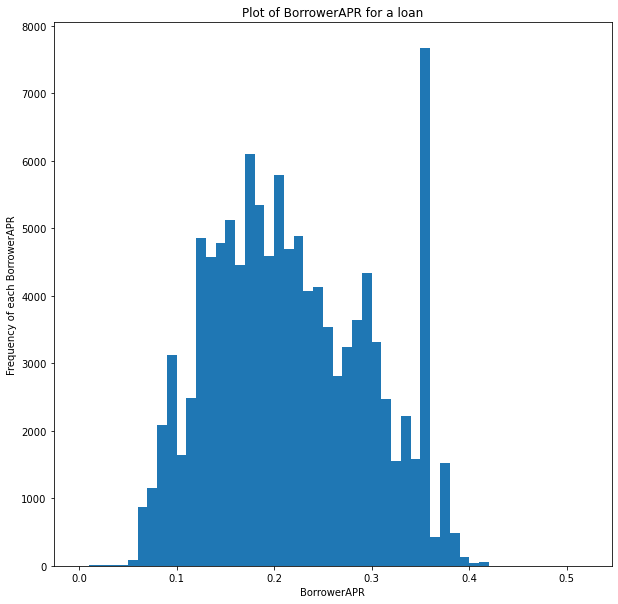

In [240]:
# standard-scaled plot displays
binsize = 0.01
bins = np.arange(0, prosper_loandata_clean['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[10, 10])
plt.hist(data = prosper_loandata_clean, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency of each BorrowerAPR')
plt.title('Plot of BorrowerAPR for a loan')
plt.show()

#### Research Question 1: Observations
The BorrowerAPR with the highest count is 0.35797. As well, the plot shows that borrower's loans had APR between less of 0.1 and a little greater than 0.4.

### Research Question 2: What is the number count of the monthly income that was most reoccurring?

In [241]:
# Summing the number of each Borrower stated monthly income
prosper_loandata_clean['StatedMonthlyIncome'].value_counts()

4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
                ... 
7069.916667        1
4266.333333        1
2211.750000        1
7032.916667        1
18756.000000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

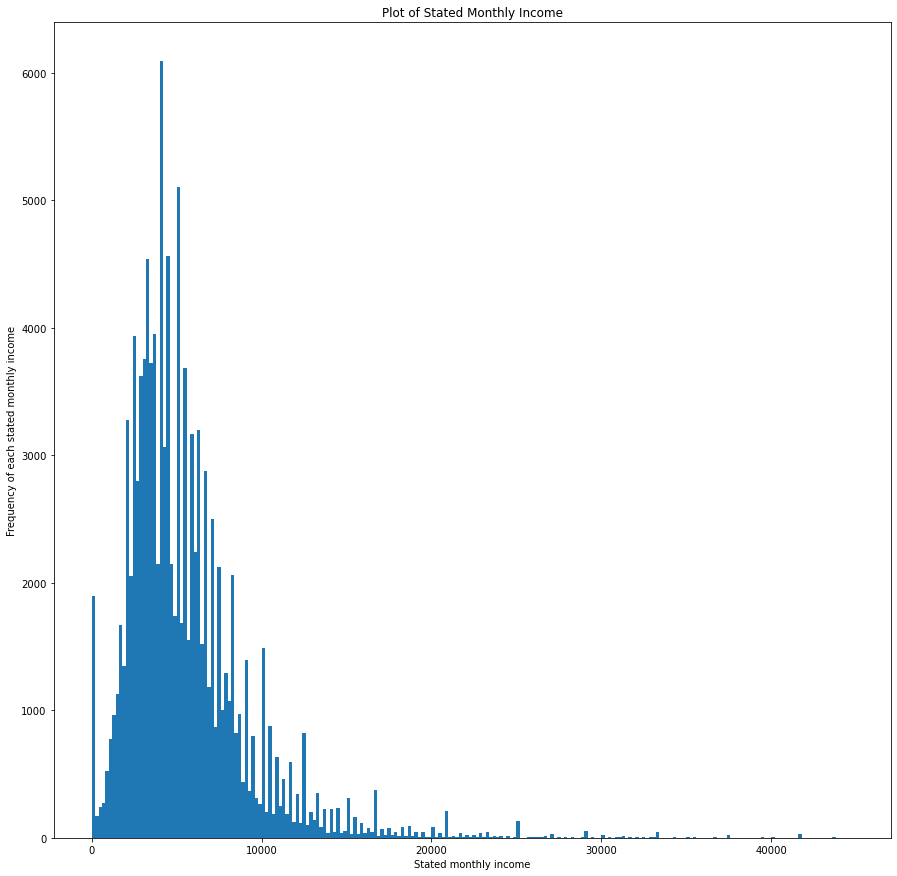

In [242]:
# Distribution of stated monthly income
bins = np.arange(0, 45000, 200)

plt.figure(figsize=[15, 15])
plt.hist(data = prosper_loandata_clean, x = 'StatedMonthlyIncome', bins=bins);
plt.xlabel('Stated monthly income')
plt.ylabel('Frequency of each stated monthly income')
plt.title('Plot of Stated Monthly Income')
plt.show()

#### Research Question 2: Observations

The stated monthly income that was most reoccurring is 4166.666667 and its count is 3526. Also, plot of the monthly income is highly right skewed.

### Research Question 3: How is the employment status of the borrowers distributed?

In [243]:
# Summing the number of each Borrower Employment Status
prosper_loandata_clean['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

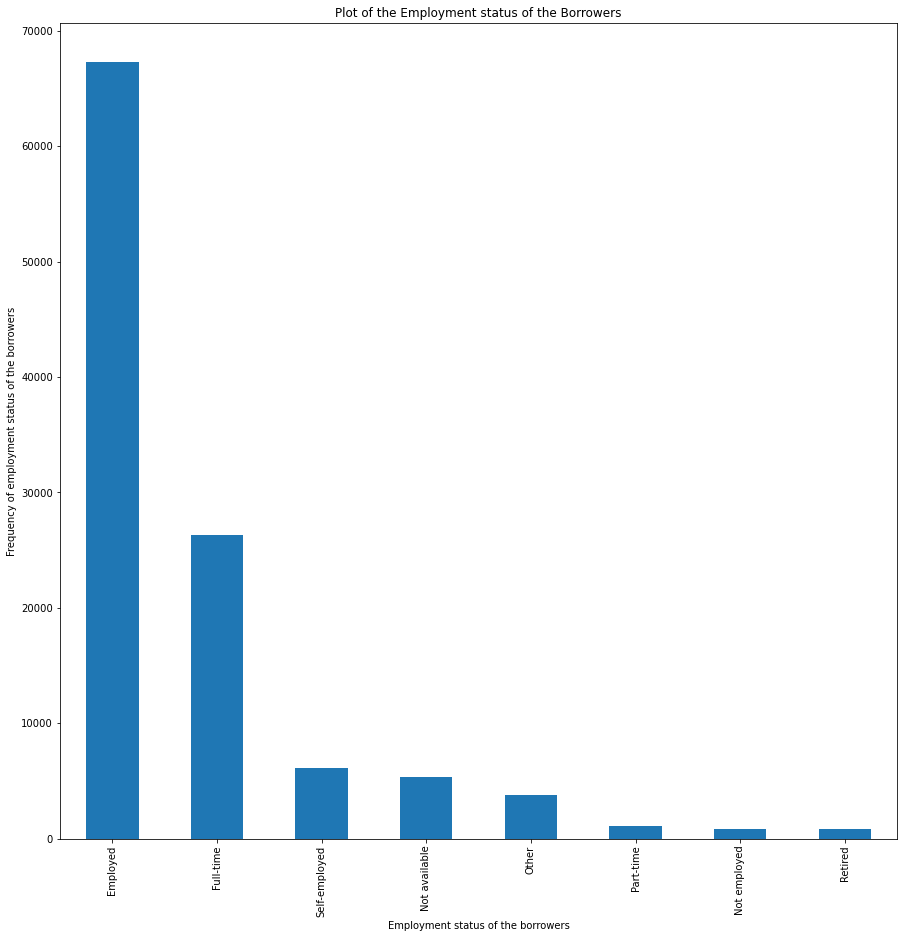

In [244]:
# Defining a function that will be used in plotting
def graph_plots(**kwargs):
    return prosper_loandata_clean[kwargs['x']].value_counts(ascending=False).head(67).plot(xlabel=kwargs['xlabel'], 
                                ylabel=kwargs['ylabel'],title=kwargs['title'], kind=kwargs['kind'], figsize=(15,15))   

graph_plots(x = 'EmploymentStatus', title = 'Plot of the Employment status of the Borrowers',
            xlabel = 'Employment status of the borrowers', ylabel = 'Frequency of employment status of the borrowers', 
            kind = 'bar'); # Plots the employment status of the borrowers                           

#### Research Question 3: Observations

Most of the borrowers are gainfully employed with a fairly large number of them having full time employment. Then, about less than 10000 of them respectively are spread across other categories namely: self-employed, retired, not employed, engaged in a part-time employment, status of employment not stated and others.

### Research Question 4: Of those borrowers employed, what employment duration that is not zero was most reoccuring?

In [245]:
# Summing the number of each Borrower Employment Status duration
prosper_loandata_clean['EmploymentStatusDuration'].value_counts()

0.0      1534
4.0      1186
1.0      1177
3.0      1174
2.0      1153
         ... 
648.0       1
662.0       1
733.0       1
690.0       1
578.0       1
Name: EmploymentStatusDuration, Length: 605, dtype: int64

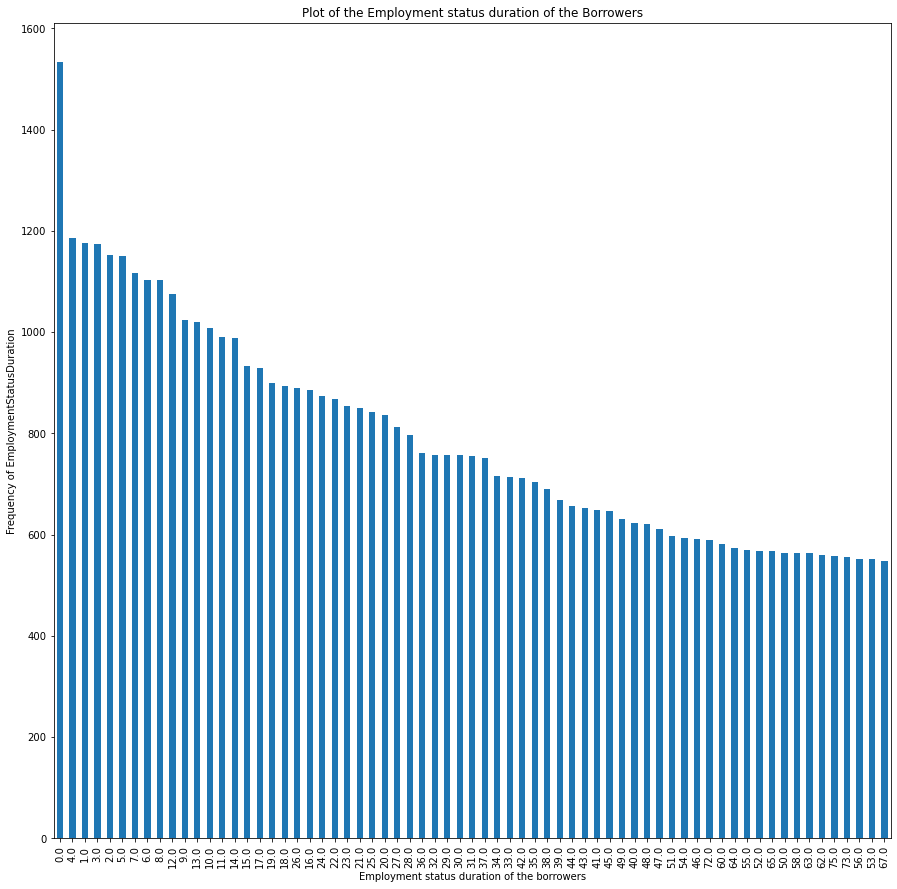

In [246]:
graph_plots(x = 'EmploymentStatusDuration', title = 'Plot of the Employment status duration of the Borrowers',
            xlabel = 'Employment status duration of the borrowers', ylabel = 'Frequency of EmploymentStatusDuration', 
            kind = 'bar'); # Plots the employment status duration of the borrowers  

#### Research Question 4: Observations
The most reoccurring employment duration is 4 days.

### Research Question 5: State the first ten line of work of the borrowers by highest number count that is not other?

In [247]:
# Summing the number of each Borrower occupation
prosper_loandata_clean['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

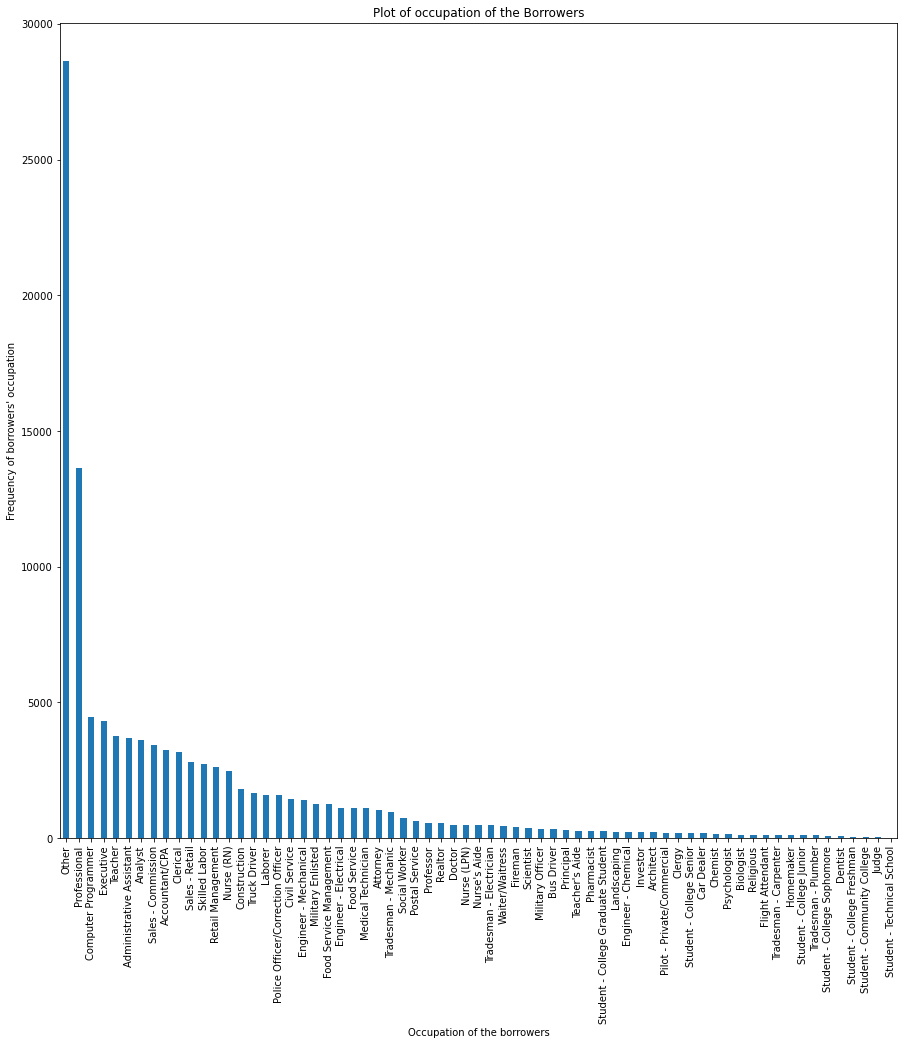

In [248]:
graph_plots(x = 'Occupation', title = 'Plot of occupation of the Borrowers',
            xlabel = 'Occupation of the borrowers', ylabel = "Frequency of borrowers' occupation", 
            kind = 'bar'); # Plots the occupation of the borrowers  

#### Research Question 5: Observations
The first ten line of work of the borrowers by highest number count includes:
- Professional
- Computer programmer
- Executive
- Teacher
- Administrative assistant
- Analyst
- Sales-commission
- Accountant/CPA
- Clerical
- Sales-retail

### Research Question 6: What does the plot of the public listing creation date by year depict?

In [249]:
# Import statement
import datetime

In [250]:
# converts the ListingCreationDate to datetime
prosper_loandata_clean['ListingCreationDate'] = pd.to_datetime(prosper_loandata_clean['ListingCreationDate'])
# adds a column for Year
prosper_loandata_clean['Year'] = prosper_loandata_clean['ListingCreationDate'].dt.year

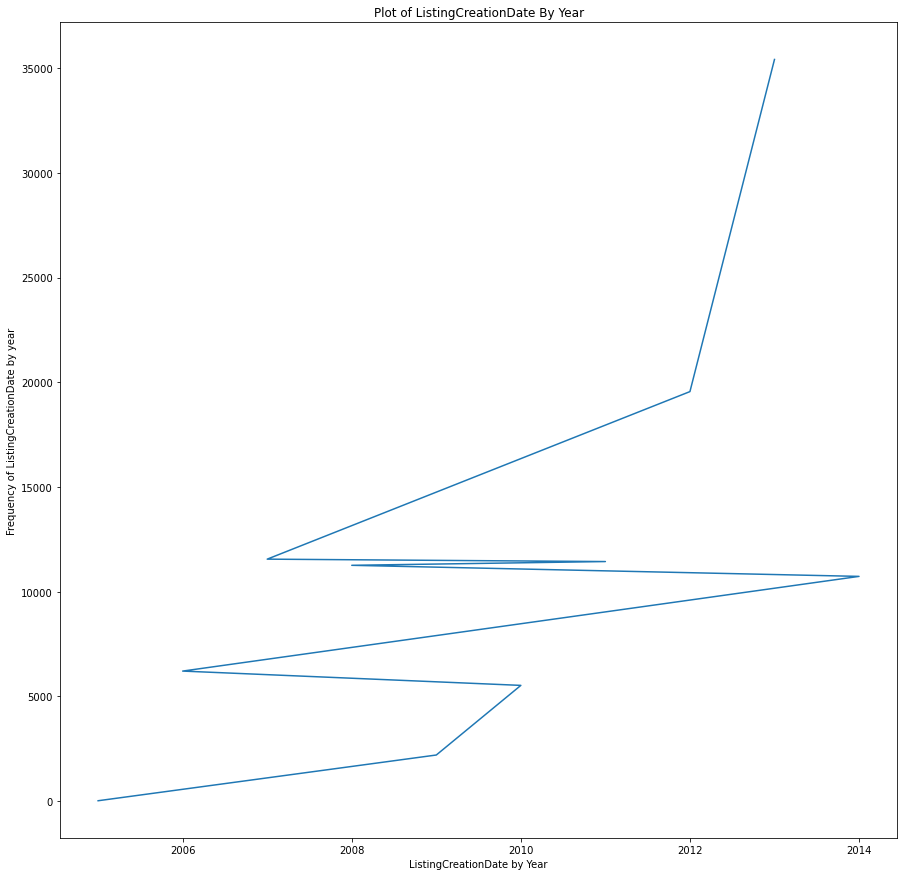

In [251]:
graph_plots(x = 'Year', title = 'Plot of ListingCreationDate By Year',
            xlabel = 'ListingCreationDate by Year', ylabel = 'Frequency of ListingCreationDate by year', 
            kind = 'line'); # Plots the ListingCreationDate by year  

#### Research Question 6: Observations
The plot of public listing creation date by year shows an irregular upward trend of the public listing.

### Research Question 7: Which month had most public listing across the years?

In [252]:
# Adds a column for Month
prosper_loandata_clean['Month'] = prosper_loandata_clean['ListingCreationDate'].dt.month

In [253]:
# Summing the number of each Month
prosper_loandata_clean['Month'].value_counts()

1     11214
10    10539
12    10320
2     10124
9     10074
11     9952
7      9506
8      9202
6      8672
5      8641
3      8032
4      7661
Name: Month, dtype: int64

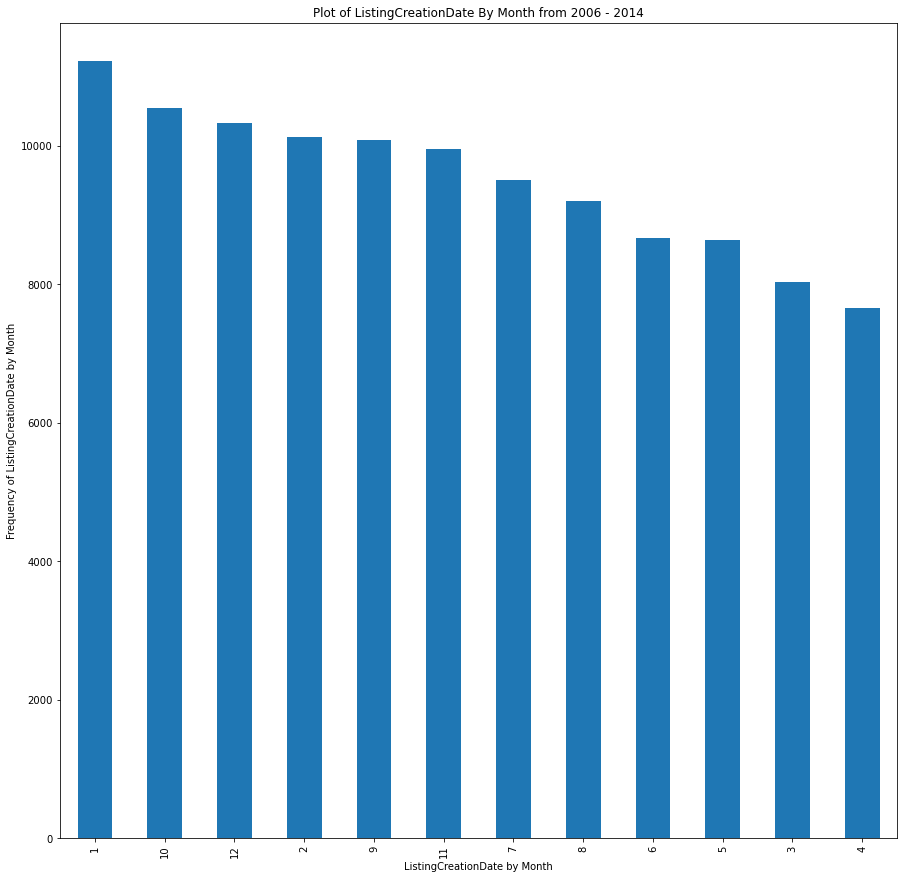

In [254]:
graph_plots(x = 'Month', title = 'Plot of ListingCreationDate By Month from 2006 - 2014',
            xlabel = 'ListingCreationDate by Month', ylabel = 'Frequency of ListingCreationDate by Month', 
            kind = 'bar'); # Plots the ListingCreationDate by Month 

#### Research Question 7: Observations
Public listing was carried out mostly in the month of January across the years. 

### Research Question 8: How was the loan term spread?

In [255]:
# Summing the number of each loan term
prosper_loandata_clean['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

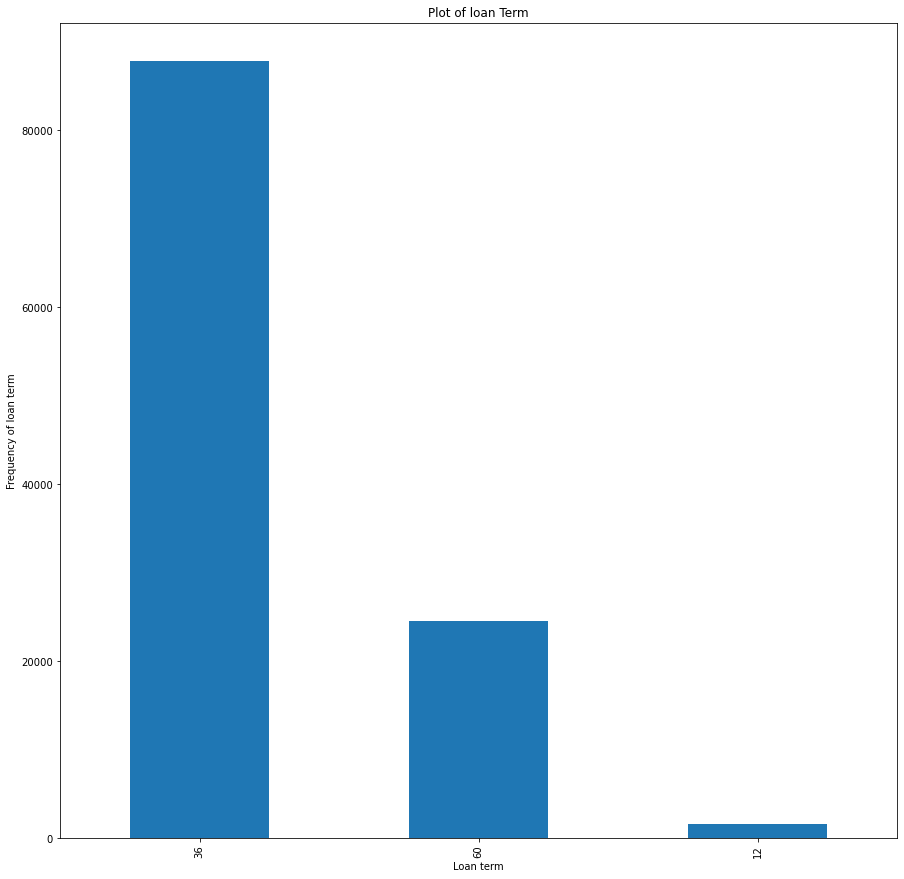

In [256]:
graph_plots(x = 'Term', title = 'Plot of loan Term',
            xlabel = 'Loan term', ylabel = 'Frequency of loan term', 
            kind = 'bar'); # Plots the loan term

#### Research Question 8: Observations
Most of the borrowers were given a 3-year period to repay the given loan. Notably is that between 1 to 5 years was given to repay the loans.

### Research Question 9: How many borrowers loan status read as defaulted?

In [257]:
# Summing the number of each loan status
prosper_loandata_clean['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

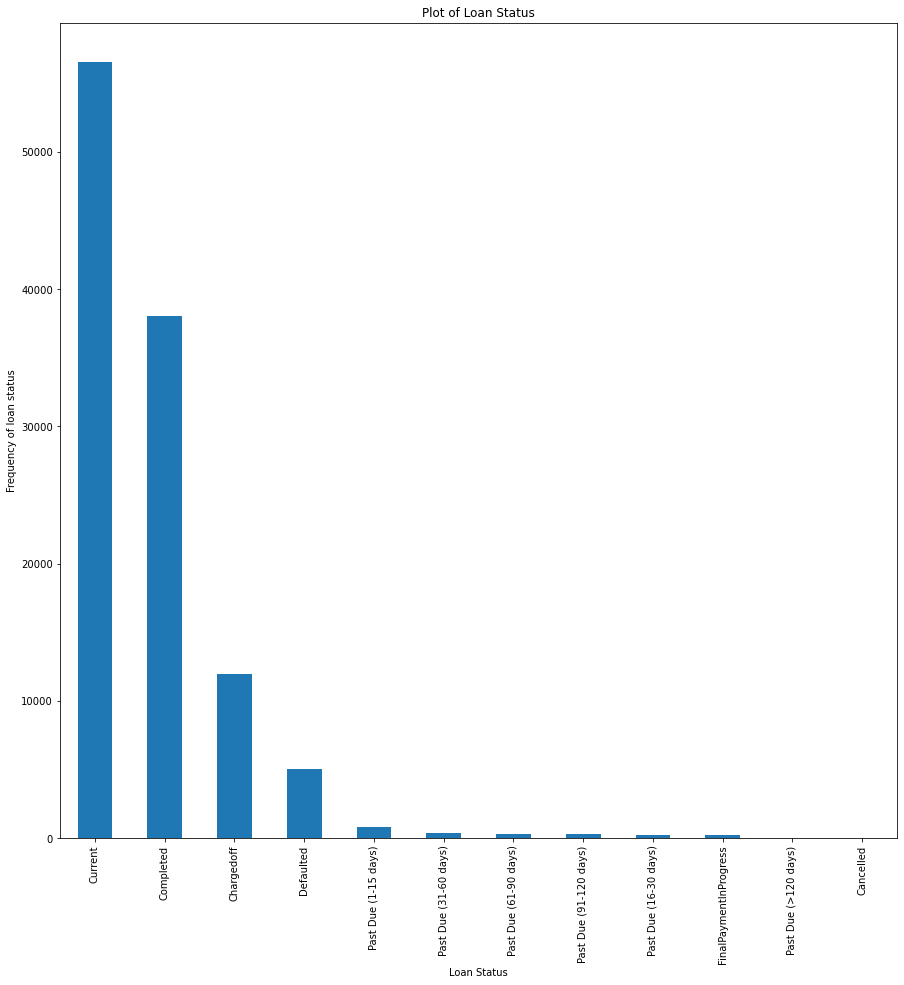

In [258]:
graph_plots(x = 'LoanStatus', title = 'Plot of Loan Status',
            xlabel = 'Loan Status', ylabel = 'Frequency of loan status', 
            kind = 'bar'); # Plots loan status

#### Research Question 9: Observation
5018 borrowers loan status read as defaulted.

### Research Question 10: What borrower rate was highest by number count?

In [259]:
# Summing the number of each borrower rate
prosper_loandata_clean['BorrowerRate'].value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.2201       1
0.0752       1
0.1416       1
0.2812       1
0.0739       1
Name: BorrowerRate, Length: 2294, dtype: int64

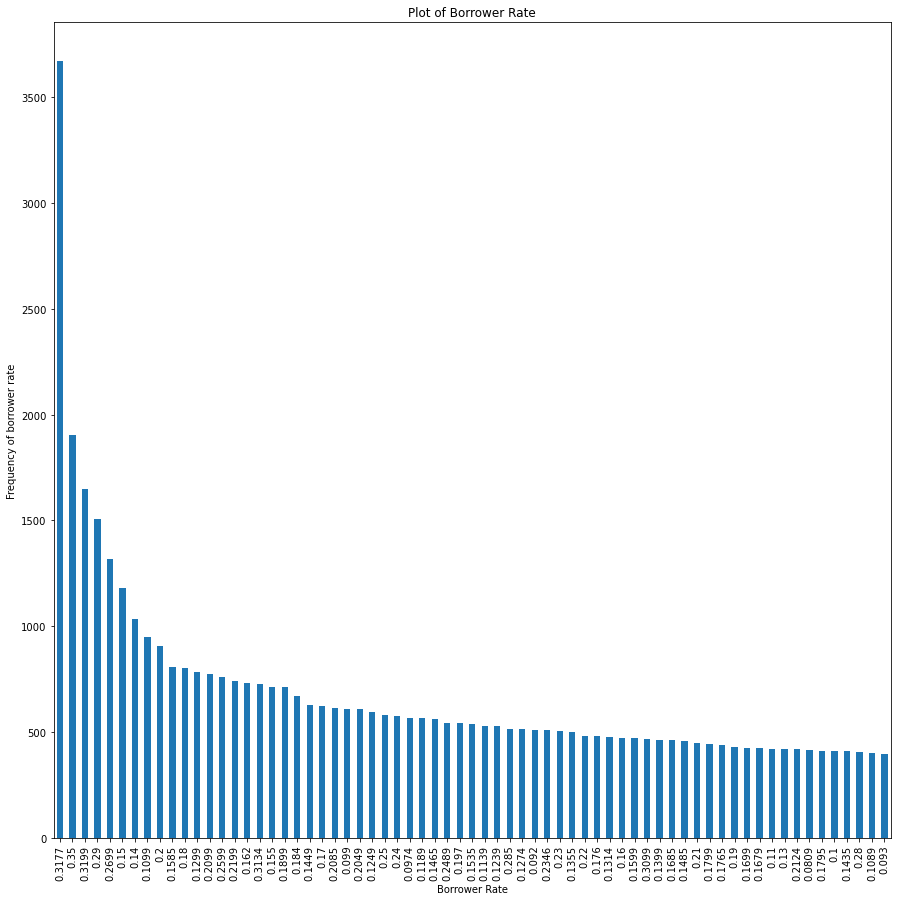

In [260]:
graph_plots(x = 'BorrowerRate', title = 'Plot of Borrower Rate',
            xlabel = 'Borrower Rate', ylabel = 'Frequency of borrower rate', 
            kind = 'bar'); # Plots borrower's rate

#### Research Question 10: Observations
The highest number count borrower rate is 0.3177.

### Research Question 11: Which loan amount was mostly given out?

In [261]:
# Summing the number of each LoanOriginalAmount
prosper_loandata_clean['LoanOriginalAmount'].value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

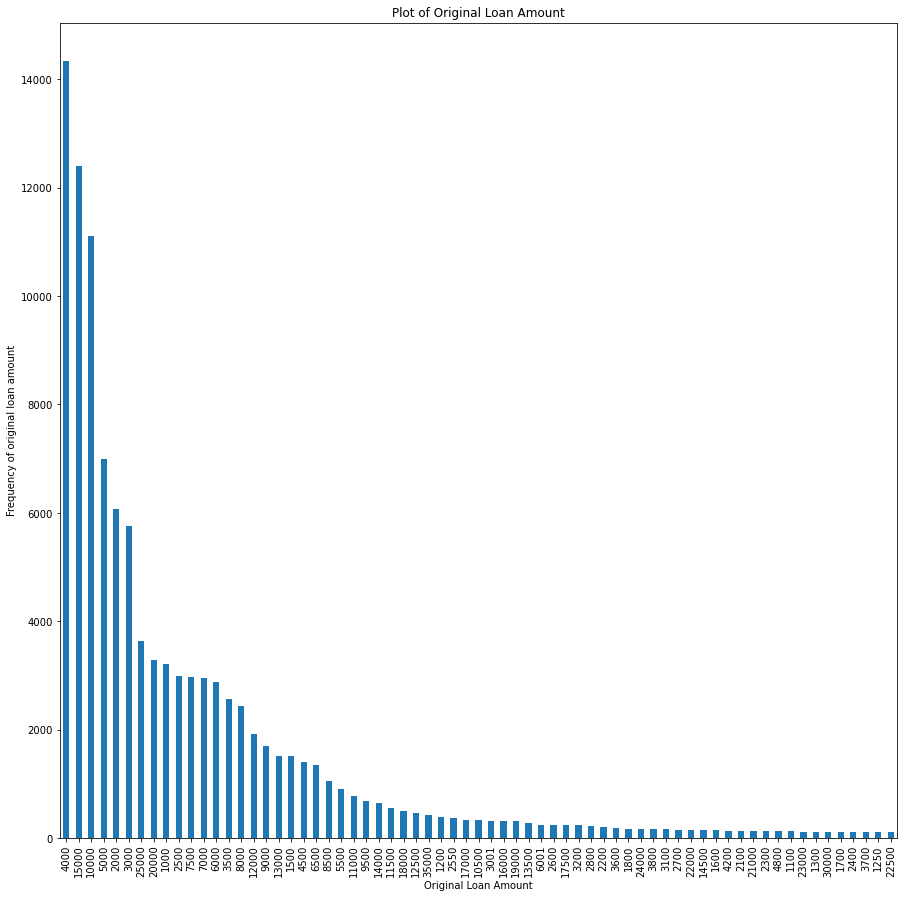

In [262]:
graph_plots(x = 'LoanOriginalAmount', title = 'Plot of Original Loan Amount',
            xlabel = 'Original Loan Amount', ylabel = 'Frequency of original loan amount', 
            kind = 'bar'); # Plots LoanOriginalAmount

#### Research Question 11: Observations
Loan amount of 4000 was mostly given out.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was no unusual points noticed and no transformation was carried out. Then, the borrowerAPR distribition is sort of multimodal in nature.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distribution was noticed. The ListingCreationDate feature was converted to datetime and the month and year therein was extracted for visual exploration. The visualization of the year shows an irregular upward trend of the public listing and most of the listing occurred in the month of January across the years.  

<a id='be'></a>
## Bivariate Exploration

Here, features of the dataset will be explored in pairs.

### Research Question 12: What type of pairwise correlations exist between the numerical features of interest of the dataset?

In [263]:
# Segments each variable into numerical and categorical variables
numeric_variables = ['BorrowerAPR', 'StatedMonthlyIncome', 'BorrowerRate', 'LoanOriginalAmount']
categorical_variables = ['Occupation', 'EmploymentStatus', 'LoanStatus', 'EmploymentStatusDuration', 'Term']

In [264]:
# Working with the subset of the dataset features of interest
list_of_columns = ['BorrowerAPR', 'StatedMonthlyIncome', 'BorrowerRate', 'LoanOriginalAmount', 'Occupation', 'LoanStatus', 
                   'EmploymentStatus', 'EmploymentStatusDuration', 'Term']
loandata_subset = prosper_loandata_clean[list_of_columns]

In [265]:
# Displays sub_dataset content
loandata_subset

,BorrowerAPR,StatedMonthlyIncome,BorrowerRate,LoanOriginalAmount,Occupation,LoanStatus,EmploymentStatus,EmploymentStatusDuration,Term
0,0.16516,3083.333333,0.1580,9425,Other,Completed,Self-employed,2.0,36
1,0.12016,6125.000000,0.0920,10000,Professional,Current,Employed,44.0,36
2,0.28269,2083.333333,0.2750,3001,Other,Completed,Not available,NaN,36
3,0.12528,2875.000000,0.0974,10000,Skilled Labor,Current,Employed,113.0,36
4,0.24614,9583.333333,0.2085,15000,Executive,Current,Employed,44.0,36
...,...,...,...,...,...,...,...,...,...
113932,0.22354,4333.333333,0.1864,10000,Food Service Management,Current,Employed,246.0,36
113933,0.13220,8041.666667,0.1110,2000,Professional,FinalPaymentInProgress,Employed,21.0,36
113934,0.23984,2875.000000,0.2150,10000,Other,Current,Employed,84.0,60
113935,0.28408,3875.000000,0.2605,15000,Food Service,Completed,Full-time,94.0,60


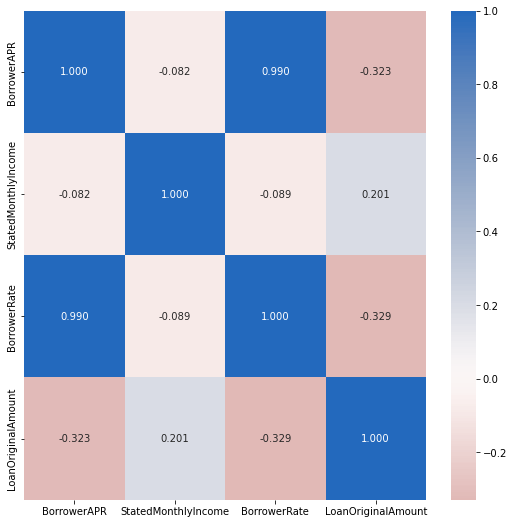

In [266]:
# correlation plot of the numerical variables
plt.figure(figsize = [9, 9])
sns.heatmap(prosper_loandata_clean[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

prosper_loandata_clean.shape= (113937, 83)
loan_samp.shape= (7000, 83)


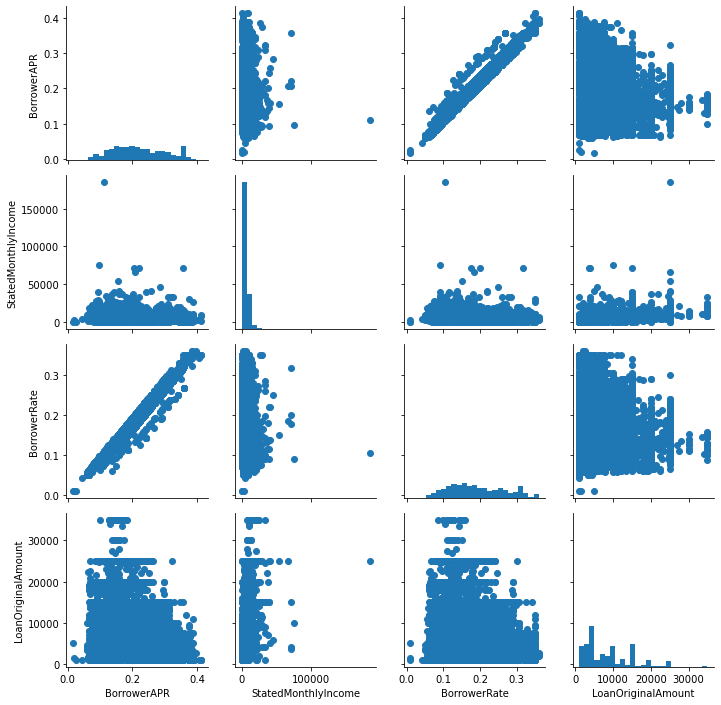

In [267]:
# plot matrix: samples 7000 loans 
print("prosper_loandata_clean.shape=",prosper_loandata_clean.shape)
print("loan_samp.shape=",loan_samp.shape)

loandata_subset_samp = loandata_subset.sample(7000)
g = sns.PairGrid(data = loandata_subset_samp.dropna(), vars = numeric_variables)
g = g.map_diag(plt.hist, bins = 25);
g.map_offdiag(plt.scatter);

#### Research Question 12: Observations 

The visualization shows that; borrowerAPR and loan original amount, stated monthly income and borrower rate, stated monthly income and borrower APR, borrower rate and loan original amount, are each pair negatively correlated.

On the other hand; borrower APR and borrower rate, stated monthly income and loan original amount, are each pair positively correlated.

### Research Question 13: What does the correlation between some of the numerical and categorical features of interest of the dataset depict?

<Figure size 576x576 with 0 Axes>

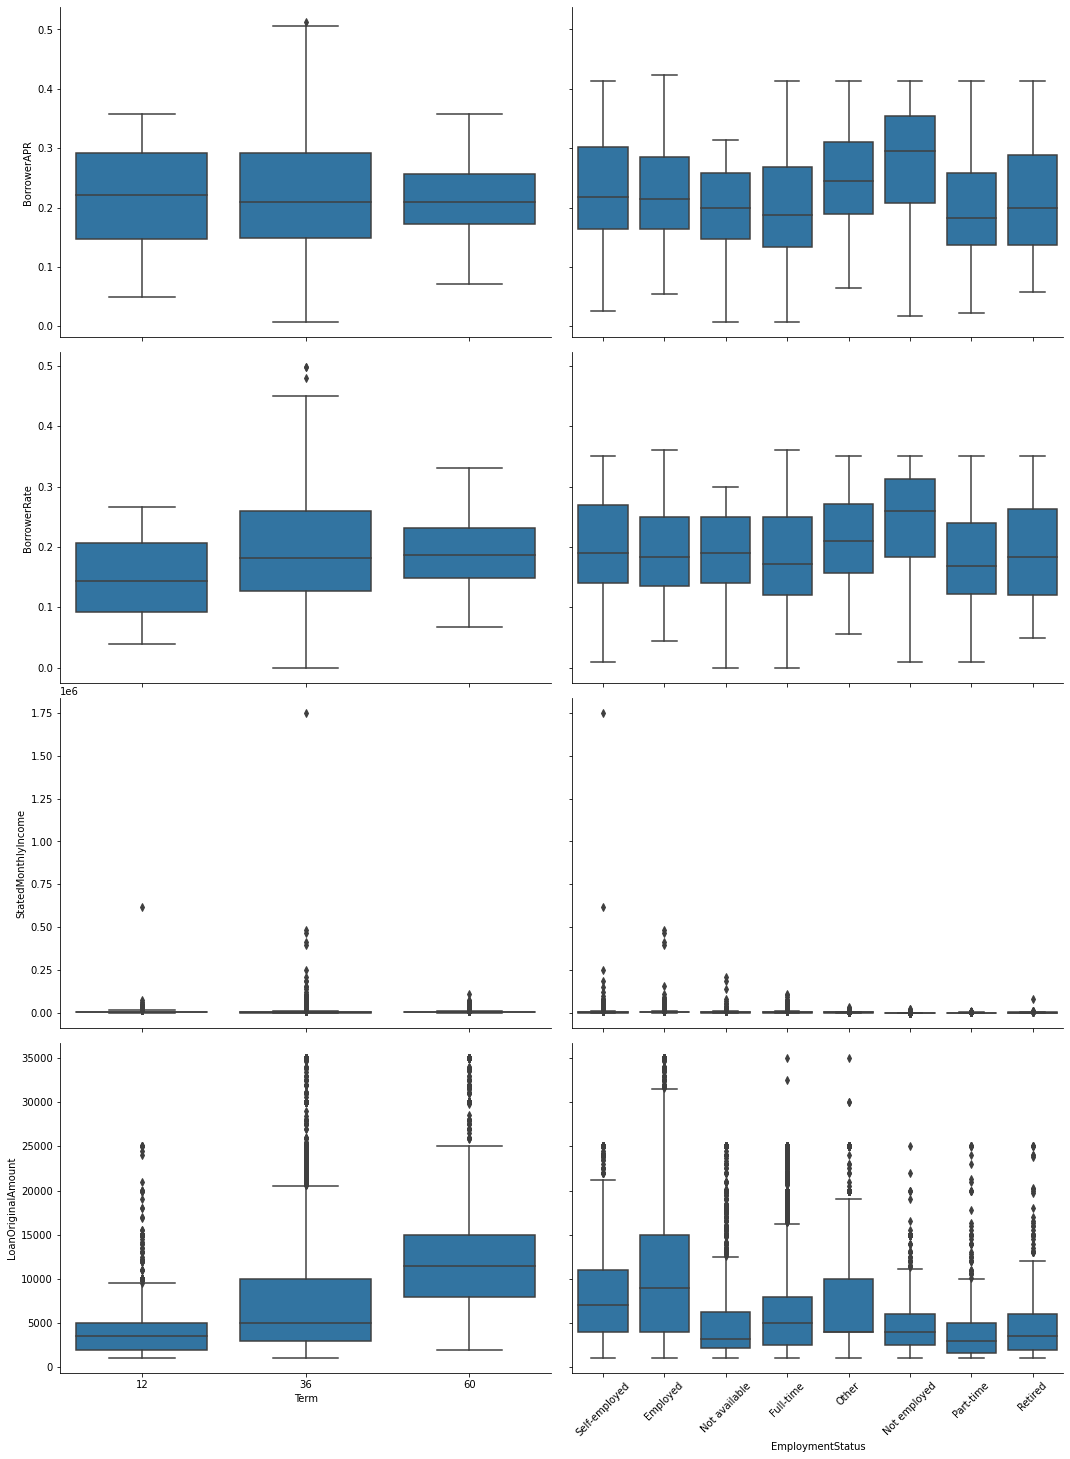

In [268]:
# plot matrix of some numeric variables against some categorical variables
def boxgrid(x, y, **kwargs):
    """creates box plots using seaborn pairgrid"""
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [8, 8])
g = sns.PairGrid(data = loandata_subset, y_vars = ['BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                 x_vars = ['Term', 'EmploymentStatus'], 
                 height = 5, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=45);

#### Research Question 13:  Observations

From the plot:
- Loan original amount increases with increase in loan term.
- Loan original amount of self-employed and employed are greater than those of not available, full-time, others, not employed, part-time and retired. While those of full-time and others are greater than those of not employed, part-time and retired.
- Borrower APR and borrower rate of Not employed and others are more than the rest.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From investigation carried out, borrowerAPR:
- was negatively correlated with loan original amount and stated monthly income. 
- was positively correlated with borrower rate.
- of Not employed and others were more than the rest of other employment status categories. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Stated monthly income and borrower rate, borrower rate and loan original amount were each pair negatively correlated. While stated monthly income and loan original amount were positively correlated.
     Loan original amount increases with increase in loan term. Then, loan original amount of self-employed and employed are greater than those of not available, full-time, others, not employed, part-time and retired. While those of full-time and others are greater than those of not employed, part-time and retired.

<a id='me'></a>
## Multivariate Exploration

> Here, three or more variables of the dataset will be investigated.

### Research Question 14: What does the correlations of the features: Term, BorrowerAPR and loanoriginalamount depict?

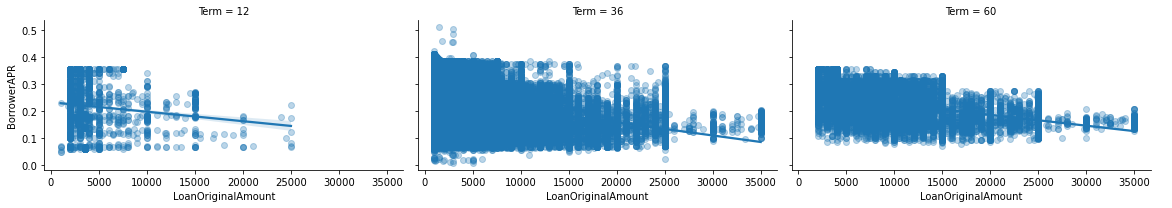

In [269]:
# Plot of Term, borrowerAPR and loanoriginalamount
g=sns.FacetGrid(data=loandata_subset, col='Term', col_wrap=3, height=3, aspect=1.8)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.3})
g.add_legend();

#### Research Question 14: Observations
Plot shows that BorrowerAPR decreases with increase in loan original amount (this is a negative correlation). And term has no effect on the other two features.

### Research Question 15: What does the correlations of the features: Term, BorrowerAPR and EmploymentStatusDuration show?¶

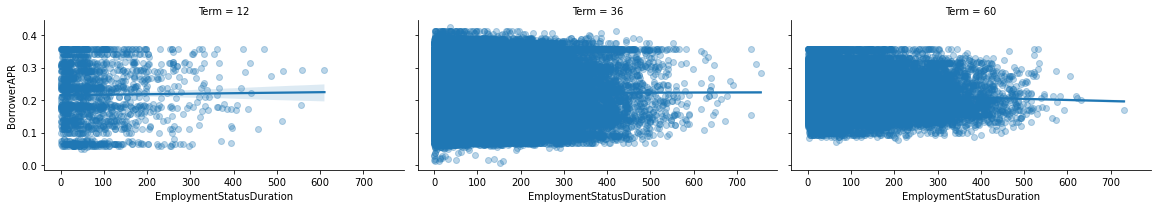

In [270]:
# Plot of Term, borrowerAPR and EmploymentStatusDuration
g=sns.FacetGrid(data=loandata_subset, col='Term', col_wrap=3, height=3, aspect=1.8)
g.map(sns.regplot, 'EmploymentStatusDuration', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.3})
g.add_legend();

#### Research Question 15: Observations
Plot shows that increase in duration of employment has little or no effect on borrowerAPR, and term has no effect on either the borrowerAPR or employment status duration.

### Research Question 16: Are there any effect on the relationship between the variables: StatedMonthlyIncome, borrowerAPR and loanstatus?

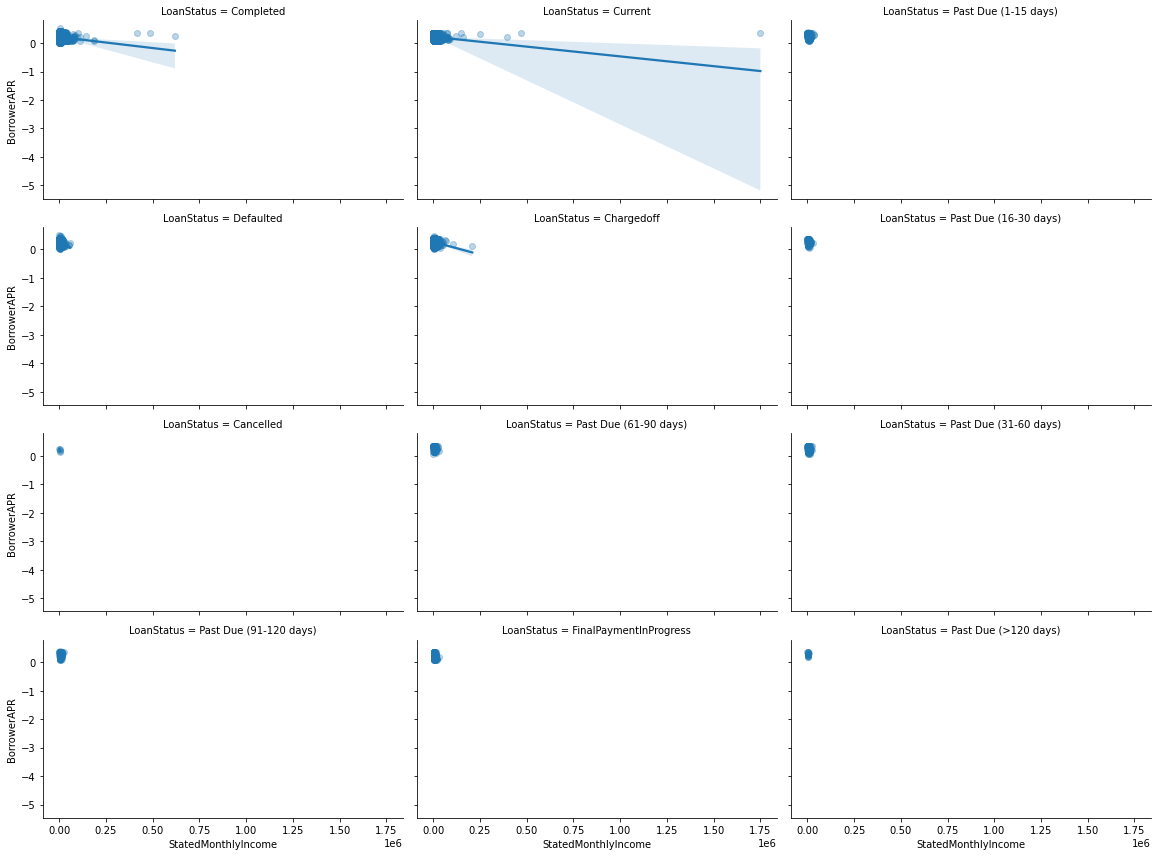

In [271]:
# Plot of Term, borrowerAPR and loanoriginalamount
g=sns.FacetGrid(data=loandata_subset, col='LoanStatus', col_wrap=3, height=3, aspect=1.8)
g.map(sns.regplot, 'StatedMonthlyIncome', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.3})
g.add_legend();

#### Research Question 16: Observations
With increase in stated monthly income, borrowerAPR decrease at some point and also remains static (clustered) at some point as well. Loan status seems to have no effect on the other two features.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the multivariate exploration carried out, it was seen that:
- term had no effect on borrowerAPR
- there was decrease in borrowerAPR with increase in loan amount
- there was some decrease as well as stagnation in borrowerAPR with increase in monthly income

### Were there any interesting or surprising interactions between features?

> Borrower APR was clustered/static at some point and as well decreased at some point with increase in stated monthly income.

<a id='conclusions'></a>
## Conclusions

The dataset was fairly clean. And based on the analysis carrried out on it, just datetime conversion was done. Investigation into the dataset shows that borrower loans had APR between less of 0.1 and a little greater than 0.4. Most of the borrowers were gainfully employed with a fairly large number of them having full time employment. Then, about less than 10000 of them respectively were spread across other categories namely: self-employed, retired, not employed, engaged in a part-time employment, status of employment not stated and others. The most reoccurring employment duration was 4 days.

Then, most of the borrowers were given a 3-year period to repay the given loan. Notably is that between 1 to 5 years was given to repay the loans and loan amount of 4000 was mostly given out.
    
Furthermore, borrowerAPR and loan original amount, stated monthly income and borrower rate, stated monthly income and borrower APR, borrower rate and loan original amount, were negatively correlated pairwise respectively. On the other hand, borrower APR and borrower rate, stated monthly income and loan original amount, were positively correlated pairwise.
    
Also, the exploration showed that loan original amount increases with increase in loan term. And, the loan original amount of those self-employed and employed were greater than those of not available, full-time, others, not employed, part-time and retired. While those of full-time and others was in turn greater than those of not employed, part-time and retired.
    
Borrower APR and borrower rate of Not employed and others were more than the rest of the employment status categories. Term had no effect either on borrowerAPR nor original loan amount when plotted alongside them.

<a id='limitations'></a>
## Limitations

The analysis of the dataset was done based on the questions posed and thus, explored to answer them. What this means is that there are other explorations that can be made on the dataset from the investigator's point of view, and possible cleaning of the dataset as well.

<a id='references'></a>
## References

[1]

https://www.programiz.com/python-programming/docstrings

[2]

https://datatofish.com/list-column-names-pandas-dataframe/

[3]

https://www.geeksforgeeks.org/get-a-list-of-a-specified-column-of-a-pandas-dataframe/

[4]

https://www.google.com/search?q=annotating+plots+matplotlib&sxsrf=ALiCzsZpzCYks6w8esQ41Ns8cLuD9xe4uw:1661499570516&source=lnms&tbm=isch&sa=X&ved=2ahUKEwimpcedgOT5AhUjJcUKHRmaBC4Q_AUoAXoECAEQAw&cshid=1661499625913874&biw=1366&bih=633

[5]

https://github.com/gimpeing/data_analysis_projects

[6]

https://datascienceparichay.com/article/pandas-extract-year-from-datetime-column/

[7]

https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

[8]

https://github.com/yduan004/communicate-data-loan-data-from-Prosper